# Best Markets for Advertising

In this scenario we are data analysts for an online e-learning company that specializes in programming courses. We cover domains such as data science, game development, but our primary focus is web and mobile development.
Our goal is to promote our products and invest money in more advertisement, but to do that we need to know what markets to advertise in.

The company operates subscription-based learning. The current price to access our learning platform is 59 USD per month.

It's costly to organize surveys, but to start with we can use a dataset from an e-learning platform called freeCodeCamp. In 2017 they performed a survey aimed at a new programmers. This survey is a good candidate to begin our analysis.

*https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969*

Github repository:
*https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data*


We want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What are the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
#style.use("fivethirtyeight")
%matplotlib inline

The first step in our analysis is to identify the appropriate columns that are relevant. Unfortunately there are over 100 columns which is far too many for a practical analysis.

In [2]:
pd.options.display.max_columns = 150 # to avoid truncated output 
csv = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory= False)
csv

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

We can use the json file from the author's github repository page to identify useful and irrelevant columns. Unfortunately it's a rather manual and tedious process and there are far too many columns to list for deletion. Instead we'll sequentially drop slices of columns since we cannot drop lists and slices at the same time using python code.

In [3]:
# Index location of the first set of columns to drop
print(csv.columns.get_loc("CodeEventConferences"))
print(csv.columns.get_loc("CodeEventWorkshops"))

8
23


In [4]:
# Drops columns
csv = csv.drop(csv.iloc[:, 8:23], axis=1)

In [5]:
# Index location of the next set of columns to drop
print(csv.columns.get_loc("NetworkID"))
print(csv.columns.get_loc("ResourceW3S"))

59
100


In [6]:
csv = csv.drop(csv.iloc[:, 59:100], axis=1)

In [7]:
print(csv.columns.get_loc("YouTubeCodeCourse"))

63


In [8]:
# Drop remaining columns including index postion 63 and onward
csv = csv.drop(csv.iloc[:, 63:], axis=1)
csv

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,1.0,"some college credit, no degree",NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,1.0,"some college credit, no degree",NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,40000.0,14.0,91756eb4dc280062a541c25a3d44cfb0,3be37b558f02daae93a6da10f83f0c77,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,"Front-End Web Developer, Full-Stack Web Deve...",from home,Portuguese,married or domestic partnership,0.0,5.0,NaN,"some college credit, no degree",NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,140000.0,NaN,NaN,female,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,aa3f061a1949a90b27bef7411ecd193f,d7c56bbf2c7b62096be9db010e86d96d,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Full-Stack Web Developer, Information Security...",in an office with other developers,Portuguese,"single, never married",0.0,24.0,NaN,bachelor's degree,Information Technology,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [9]:
csv.info(memory_usage= "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15367 non-null  float64
 1   AttendedBootcamp               17709 non-null  float64
 2   BootcampFinish                 1069 non-null   float64
 3   BootcampLoanYesNo              1079 non-null   float64
 4   BootcampName                   949 non-null    object 
 5   BootcampRecommend              1073 non-null   float64
 6   ChildrenNumber                 2314 non-null   float64
 7   CityPopulation                 15354 non-null  object 
 8   CodeEventWorkshops             1753 non-null   float64
 9   CommuteTime                    9246 non-null   object 
 10  CountryCitizen                 15382 non-null  object 
 11  CountryLive                    15336 non-null  object 
 12  EmploymentField                8116 non-null  

In [10]:
csv.iloc[:,:20]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,I work from home,Brazil,Brazil,software development and IT,NaN,Employed for wages,NaN,40000.0,0.0,NaN,male
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,Portugal,Portugal,NaN,NaN,Not working but looking for work,NaN,140000.0,NaN,NaN,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,I work from home,Indonesia,Indonesia,software development and IT,NaN,Self-employed freelancer,NaN,NaN,0.0,NaN,male
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,Less than 15 minutes,Nigeria,Nigeria,transportation,NaN,Self-employed freelancer,NaN,70000.0,1.0,NaN,male
18172,39.0,0.0,NaN,NaN,NaN,NaN,3.0,more than 1 million,1.0,45 to 60 minutes,South Africa,South Africa,NaN,IT support and website update,Employed for wages,NaN,NaN,0.0,1.0,male
18173,54.0,0.0,NaN,NaN,NaN,NaN,3.0,"between 100,000 and 1 million",NaN,Less than 15 minutes,United Kingdom,United Kingdom,education,NaN,Employed for wages,NaN,NaN,0.0,NaN,male


If we utilize the following code below we'll get a better understanding of missing data in the columns. We expect for a lot of columns to be missing data, because there are likely many instances of respondents failing to enter information during the survey. 

In [11]:
#pd.set_option('display.max_rows', None)  # or 1000
series = csv.apply(pd.isnull).sum()/csv.shape[0] * 100

# Columns with less than or equal to 60% missing data points
list = series[series <= 60].index


In [12]:
print(series)

Age                  15.449794
AttendedBootcamp      2.563961
BootcampFinish       94.118294
BootcampLoanYesNo    94.063274
BootcampName         94.778542
                       ...    
MonthsProgramming     6.002751
ResourceW3S          46.272352
SchoolDegree         15.444292
SchoolMajor          51.983494
StudentDebtOwe       81.502063
Length: 63, dtype: float64


In [13]:
# Converts the list of columns we want to use from pandas.index to list
cols_to_use = pd.Index.tolist(list)
cols_to_use.append("JobRoleInterest")

In [14]:
# Isolates the dataframe down to only preferred columns
csv = csv[cols_to_use]

In [15]:
csv

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,ResourceW3S,SchoolDegree,SchoolMajor,JobRoleInterest
0,27.0,0.0,more than 1 million,15 to 29 minutes,Canada,Canada,software development and IT,Employed for wages,female,1.0,0.0,1.0,0.0,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,start your own business,NaN,English,married or domestic partnership,150.0,6.0,1.0,"some college credit, no degree",NaN,NaN
1,34.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,0.0,1.0,0.0,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a nonprofit,in an office with other developers,English,"single, never married",80.0,6.0,1.0,"some college credit, no degree",NaN,Full-Stack Web Developer
2,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,male,0.0,0.0,1.0,0.0,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,work for a medium-sized company,no preference,Spanish,"single, never married",1000.0,5.0,NaN,high school diploma or equivalent (GED),NaN,"Front-End Web Developer, Back-End Web Develo..."
3,26.0,0.0,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,male,1.0,1.0,1.0,0.0,14.0,91756eb4dc280062a541c25a3d44cfb0,3be37b558f02daae93a6da10f83f0c77,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a medium-sized company,from home,Portuguese,married or domestic partnership,0.0,5.0,NaN,"some college credit, no degree",NaN,"Front-End Web Developer, Full-Stack Web Deve..."
4,20.0,0.0,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,female,0.0,0.0,1.0,0.0,10.0,aa3f061a1949a90b27bef7411ecd193f,d7c56bbf2c7b62096be9db010e86d96d,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a multinational corporation,in an office with other developers,Portuguese,"single, never married",0.0,24.0,NaN,bachelor's degree,Information Technology,"Full-Stack Web Developer, Information Security..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18170,41.0,0.0,more than 1 million,I work from home,Indonesia,Indonesia,software development and IT,Self-employed freelancer,male,1.0,1.0,0.0,0.0,10.0,3ca0354e77ccbdf5d762adab90ffff91,34d08433308c04cd55708ba405d8b519,60000.0,0.0,0.0,0.0,0.0,NaN,start your own business,NaN,Indonesian,married or domestic partnership,10.0,1.0,NaN,bachelor's degree,Telecommunications Technician,NaN
18171,31.0,0.0,more than 1 million,Less than 15 minutes,Nigeria,Nigeria,transportation,Self-employed freelancer,male,1.0,1.0,0.0,0.0,1.0,fc867e53a2adb0b425d2acacaef17faa,6798a2a1aa62ec516ac2ac540883001a,60000.0,0.0,0.0,0.0,1.0,more than 12 months from now,work for a nonprofit,no preference,English,divorced,10000.0,1.0,NaN,high school diploma or equivalent (GED),NaN,"DevOps / SysAdmin, Mobile Developer, Pro..."
18172,39.0,0.0,more than 1 million,45 to 60 minutes,South Africa,South Africa,NaN,Employed for wages,male,1.0,1.0,0.0,0.0,10.0,6871d7f091c6541d3d0a6ebd159f31d2,f6fdd490538c1ae2f36acb1c4d8b829e,1000000.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,Zulu,married or domestic partnership,19.0,3.0,1.0,some high school,NaN,NaN
18173,54.0,0.0,"between 100,000 and 1 million",Less than 15 minutes,United Kingdom,United Kingdom,education,Employed for wages,male,0.0,1.0,1.0,0.0,1.0,2ebc31e984139abf0e45b431920fa70d,a

In [16]:
# Drop id.x and id.y columns
csv = csv.drop(columns=["ID.x","ID.y"])

In [17]:
# Count missing data
nulls = csv.apply(pd.isnull).sum()/csv.shape[0] * 100
nulls = nulls.sort_values()

In [18]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            15367 non-null  float64
 1   AttendedBootcamp               17709 non-null  float64
 2   CityPopulation                 15354 non-null  object 
 3   CommuteTime                    9246 non-null   object 
 4   CountryCitizen                 15382 non-null  object 
 5   CountryLive                    15336 non-null  object 
 6   EmploymentField                8116 non-null   object 
 7   EmploymentStatus               14345 non-null  object 
 8   Gender                         15454 non-null  object 
 9   HasDebt                        15291 non-null  float64
 10  HasFinancialDependents         15329 non-null  float64
 11  HasHighSpdInternet             15380 non-null  float64
 12  HasServedInMilitary            15256 non-null 

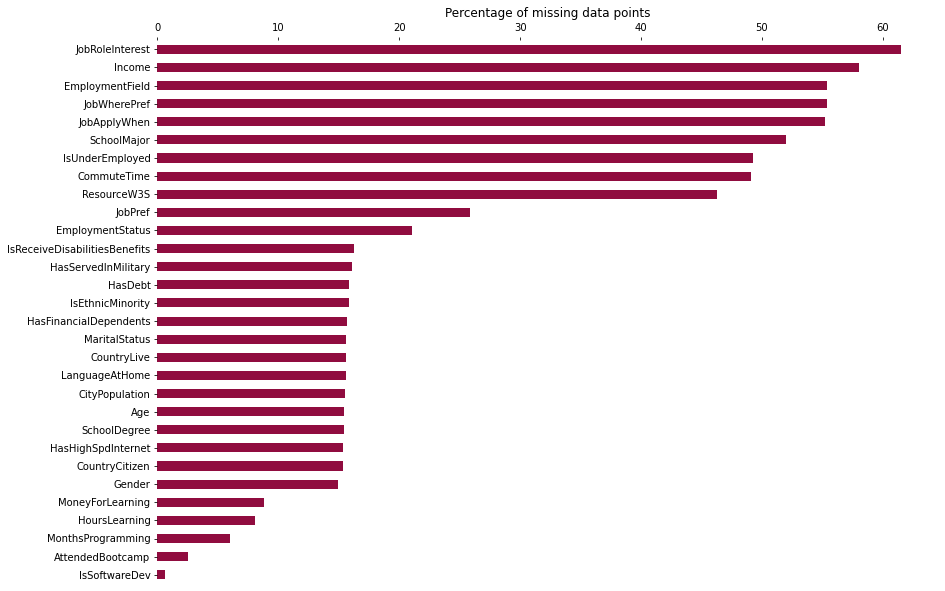

In [19]:
#sns.set_style("white")
fig, ax = plt.subplots(figsize = (14, 10))
nulls.plot(kind = "barh", color = "#900C3F")
plt.title("Percentage of missing data points")
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
ax.xaxis.tick_top()
plt.show()

Most of the courses offered on our e-learning platform are for web and mobile development. We need to identify if the sample from the dataset is representative of the population of new coders.

In [20]:
interests = csv["JobRoleInterest"].value_counts(normalize=True) * 100
interests.head(20)

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

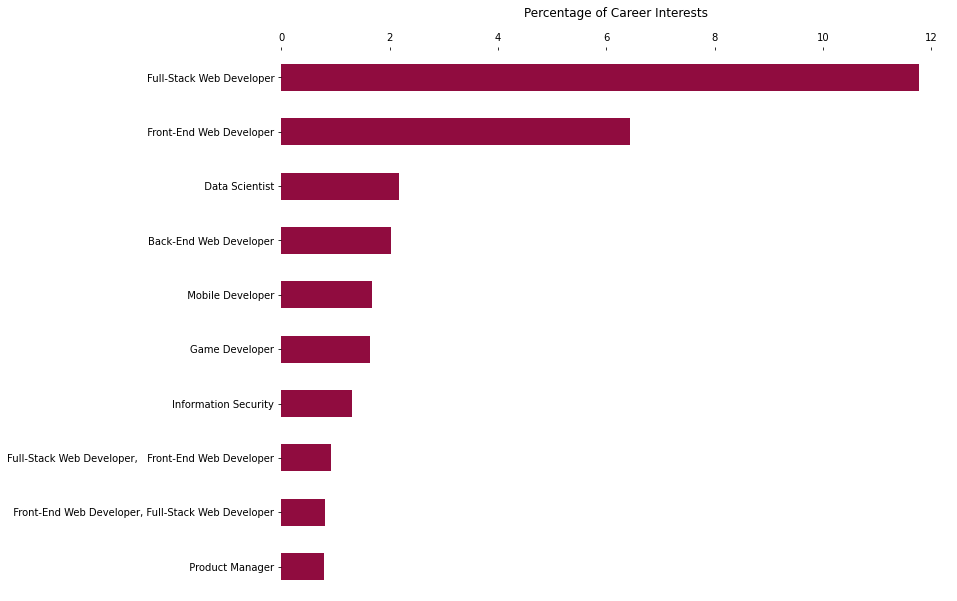

In [21]:
fig, ax = plt.subplots(figsize = (12, 10))
interests.head(10).plot(kind = "barh", color = "#900C3F")
plt.title("Percentage of Career Interests", y = 1.05)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.show()

A lot of people are interested in learning about web development (full stack, front end, and back end). However we have many more entries that include multiple categories, so it looks like we have a representative sample. While we have many different job interest categories, more than 60 % of the data points in the `JobRoleInterest` column are missing.

As there are many other entries that include multiple job categories we can split each string for each row in the `JobRoleInterest` column. This will help us understand the number of choices that each person selected. 

When we selected only the `JobRoleInterest` column from earlier we saw that many rows contained multiple job role interests or (categories). Some people stated they were interested in many, and some expressed interest in only one. To split the data points we'll need to exlude missing data, because we cannot split NaNs (missing data).

We can split each occurance of a job category for rows containing multiple categories. To do this we'll have to use `pandas.Series.str.split`. This approach will help us count every individual job category.

In [22]:
# Creates separate copy from main dataframe
survey = csv.copy()

# New dataframe excluding any missing data from JobRoleInterest column
survey = csv[csv["JobRoleInterest"].notnull()].copy()

# Splits each occurence of a job category
survey["JobRoleInterest"] = survey["JobRoleInterest"].str.split("\s*,\s*")

In [23]:
survey

,Age,AttendedBootcamp,CityPopulation,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobPref,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,ResourceW3S,SchoolDegree,SchoolMajor,JobRoleInterest
1,34.0,0.0,"less than 100,000",NaN,United States of America,United States of America,NaN,Not working but looking for work,male,1.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a nonprofit,in an office with other developers,English,"single, never married",80.0,6.0,1.0,"some college credit, no degree",NaN,[Full-Stack Web Developer]
2,21.0,0.0,more than 1 million,15 to 29 minutes,United States of America,United States of America,software development and IT,Employed for wages,male,0.0,0.0,1.0,0.0,25.0,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,work for a medium-sized company,no preference,Spanish,"single, never married",1000.0,5.0,NaN,high school diploma or equivalent (GED),NaN,"[ Front-End Web Developer, Back-End Web Devel..."
3,26.0,0.0,"between 100,000 and 1 million",I work from home,Brazil,Brazil,software development and IT,Employed for wages,male,1.0,1.0,1.0,0.0,14.0,24000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a medium-sized company,from home,Portuguese,married or domestic partnership,0.0,5.0,NaN,"some college credit, no degree",NaN,"[ Front-End Web Developer, Full-Stack Web Dev..."
4,20.0,0.0,"between 100,000 and 1 million",NaN,Portugal,Portugal,NaN,Not working but looking for work,female,0.0,0.0,1.0,0.0,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,work for a multinational corporation,in an office with other developers,Portuguese,"single, never married",0.0,24.0,NaN,bachelor's degree,Information Technology,"[Full-Stack Web Developer, Information Securit..."
6,29.0,0.0,"between 100,000 and 1 million",30 to 44 minutes,United Kingdom,United Kingdom,NaN,Employed for wages,female,1.0,0.0,1.0,0.0,16.0,40000.0,NaN,0.0,0.0,0.0,I'm already applying,work for a medium-sized company,no preference,English,married or domestic partnership,0.0,12.0,1.0,"some college credit, no degree",NaN,[Full-Stack Web Developer]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18161,32.0,0.0,more than 1 million,15 to 29 minutes,Republic of Serbia,Republic of Serbia,education,Self-employed freelancer,male,0.0,1.0,1.0,0.0,10.0,6000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a medium-sized company,in an office with other developers,Serbian,married or domestic partnership,0.0,6.0,NaN,bachelor's degree,Mathematics Teacher Education,[Full-Stack Web Developer]
18162,26.0,0.0,"between 100,000 and 1 million",30 to 44 minutes,Philippines,Philippines,NaN,Employed for wages,male,0.0,1.0,1.0,0.0,15.0,60000.0,0.0,0.0,0.0,1.0,Within the next 6 months,work for a startup,no preference,Tagalog,"single, never married",0.0,84.0,NaN,associate's degree,Computer Science,"[ Data Scientist, Game Developer, Quality Ass..."
18163,57.0,0.0,more than 1 million,I work from home,India,United States of America,software development and IT,Self-employed freelancer,male,0.0,1.0,1.0,1.0,25.0,60000.0,0.0,0.0,0.0,1.0,I'm already applying,work for a nonprofit,in an office with other developers,Bengali,married or domestic partnership,0.0,NaN,1.0,bachelor's degree,Electrical Engineering,"[Back-End Web Developer, Data Engineer, Data S..."
18171,31.0,0.0,more than 1 million,Less than 15 minutes,Nigeria,Nigeria,transportation,Self-employed freelancer,male,1.0,1.0,0.0,0.0,1.0,60000.0,0.0,0.0,0.0,1.0,more than 12 months from now,work for a nonprofit,no preference,English,divorced,10000.0,1.0,NaN,high school diploma or equivalent (GED),NaN,"[ DevOps / SysAdmin, Mobile Developer, Produc..."


In [24]:
survey["JobRoleInterest"]

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer, Back-End Web Devel...
3        [  Front-End Web Developer, Full-Stack Web Dev...
4        [Full-Stack Web Developer, Information Securit...
6                               [Full-Stack Web Developer]
                               ...                        
18161                           [Full-Stack Web Developer]
18162    [  Data Scientist, Game Developer, Quality Ass...
18163    [Back-End Web Developer, Data Engineer, Data S...
18171    [  DevOps / SysAdmin, Mobile Developer, Produc...
18174    [Back-End Web Developer, Data Engineer, Data S...
Name: JobRoleInterest, Length: 6992, dtype: object

In [25]:
# Counts each occurence of a particular category
category_count = dict()

# For loop for counting each individual category in the JobRoleInterest column
for categories in survey["JobRoleInterest"]: 
    for category in categories:
        if category in category_count:
            category_count[category] += 1 # counts category key if already present in dictionary
        else:
            category_count[category] = 1 # adds unique category key to dictionary if not already present

# Transforms dictionary to dataframe 
category_count = pd.DataFrame.from_dict(category_count, orient="index", columns= ["Count"])
category_count = category_count.reset_index(level = 0)
category_count = category_count.rename(columns = {"index":"Interests"})

In [26]:
category_count["Interests"].unique()

array(['Full-Stack Web Developer', '  Front-End Web Developer',
       'Back-End Web Developer', 'DevOps / SysAdmin', 'Mobile Developer',
       'Information Security', 'Front-End Web Developer',
       'Quality Assurance Engineer', 'Game Developer',
       'User Experience Designer', '  DevOps / SysAdmin',
       'Data Scientist', 'Data Engineer', '  Data Scientist',
       '  Mobile Developer', 'Product Manager', '  Product Manager',
       '  User Experience Designer', '  Quality Assurance Engineer',
       'Ethical Hacker', 'security expert', 'Technical Writer',
       'Researcher', 'Systems Engineer',
       'Desktop Applications Programmer', 'Robotics', 'Non technical ',
       'UI Design', 'Software engineer ', 'email coder', 'Data analyst',
       'I dont yet know', 'UX developer/designer',
       'support scientific resaerch ', 'AI and neuroscience',
       'Full Stack Software Engineer', 'Program Manager',
       'Application Support Analyst',
       "This futurist's dream of

There are many different "job interests" throughout the survey, and it's obvious that respondents were able to write-in their own response to the question. The biggest downfall of this approach to asking career interest is that we end up with many different variations of the same career, different spelling and capitalization, and unknown responses. 

Python-Pandas counts these all as unique values so it is more difficult to get a completely accurate count. For example, different variations of "Front-End Developer". We do see some extra whitespace scattered throughout some of the values too. In order to clean up some of the values in this dataframe we'll strip any extra white space and change everything to lower case font.

In [27]:
# Strips whitespace, changes to lower case 
category_count["Interests"] = category_count["Interests"].str.lstrip().str.rstrip().str.lower()

# Groupy by interests and adds up the number of occurences
category_count.groupby("Interests").sum().sort_values(by = "Count", ascending= False).head(50)

,Count
Interests,
full-stack web developer,4198
front-end web developer,3533
back-end web developer,2772
mobile developer,2305
data scientist,1643
game developer,1628
user experience designer,1469
information security,1326
data engineer,1248


After some data cleaning we can see that it's not perfect, but we definitely can tell that we have quite a range of interests ranging from primarily web-development to data science, game development and many other interests.

While we have many mixed interests, this is a good way to show that individuals might be interested in other topics than just web-development. We also see that some individuals responded with different versions of "I don't know". While we already got a good understanding of job interests in previous code output, this is certainly a more granular approach.

Now that we have a better understanding of why people are learning new coding skills, we also need to find out where most respondents are from. In order to advertise in the right markets we have to know where our potential customers are located. We can use the `CountryLive` column to find this information.

In [28]:
survey["CountryLive"].describe()

count                         6838
unique                         137
top       United States of America
freq                          3125
Name: CountryLive, dtype: object

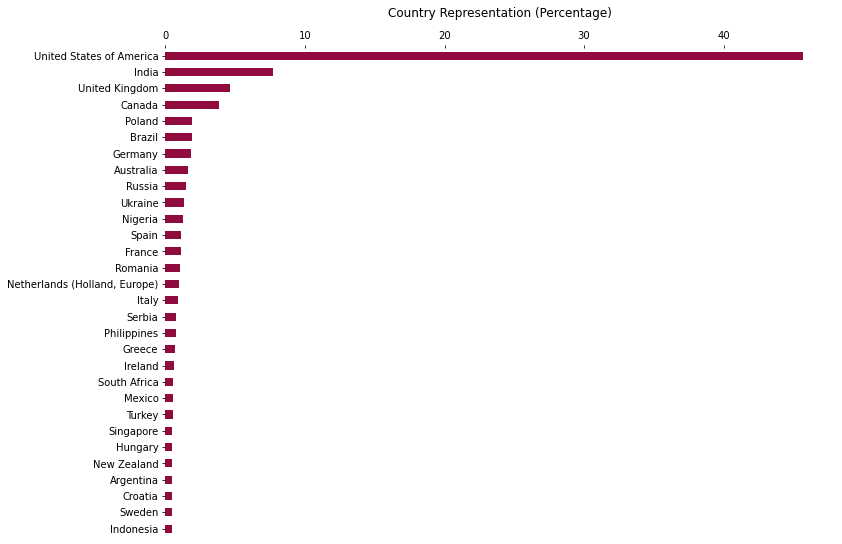

In [29]:
# Percentage of each country in dataframe
fig, ax = plt.subplots(figsize = (12, 9))
ax = (survey["CountryLive"].value_counts(normalize= True).head(30) * 100).plot(kind="barh", color = "#900C3F")
plt.title("Country Representation (Percentage)", y = 1.05)
plt.gca().spines[["right", "left", "top", "bottom"]].set_visible(False)
plt.gca().invert_yaxis()
ax.xaxis.tick_top()
plt.show()

A vast majority of respondents reside in the United States, followed by India at about 7 % and the United Kingdom at 5 %. Before making a decision, we need to find out how much are new programmers willing to spend on education. If we advertise in markets that are only interested in free learning we're unlikely to be profitable.

`MoneyForLearning` column describes the amount of money that survey participants have spent since the beginning of their programming journey. Since our business model operates on a monthly subscription we are interested in how much customers are willing to spend per month. To find that information we need to create a new column.

Formula: `MoneyForLearning` / `MonthsProgramming` 

In [30]:
survey["MonthsProgramming"].value_counts().head(20)

1.0     767
2.0     669
6.0     654
3.0     637
12.0    616
24.0    422
4.0     367
5.0     279
36.0    251
0.0     235
8.0     195
18.0    160
10.0    144
7.0     124
48.0    112
9.0     102
20.0     92
30.0     82
60.0     79
14.0     76
Name: MonthsProgramming, dtype: int64

To avoid dividing by zero, we'll need to change that particular value with 1. We can at least assume that respondents that answered with 0 months experience had probably just started and had only a few weeks of experience. For simplicity we'll change it to 1.

In [31]:
spending = survey.copy()
spending["MonthsProgramming"] = spending["MonthsProgramming"].replace({0:1})

In [32]:
spending["MonthsProgramming"].describe()

count    6633.000000
mean       13.681140
std        29.586196
min         1.000000
25%         2.000000
50%         6.000000
75%        15.000000
max       744.000000
Name: MonthsProgramming, dtype: float64

In [40]:
spending["Monthly_spending"] = spending["MoneyForLearning"] / spending["MonthsProgramming"]
spending["Monthly_spending"].value_counts(dropna=False)


0.000000       3092
NaN             675
50.000000       128
25.000000       120
16.666667       118
               ... 
875.000000        1
67.500000         1
1350.000000       1
185.714286        1
297.000000        1
Name: Monthly_spending, Length: 494, dtype: int64

In [37]:
spending["Monthly_spending"].isna().sum()

675

In [47]:
# Drop missing data from following columns
spending = spending.dropna(subset=["CountryLive","Monthly_spending"])
spending.groupby("CountryLive")["Monthly_spending"].mean().sort_values(ascending=False).head(30)

CountryLive
Yemen                       10000.000000
Puerto Rico                  4291.394558
Austria                       936.208333
Spain                         784.553084
Jamaica                       747.037037
Hong Kong                     523.341049
Trinidad & Tobago             500.000000
Australia                     419.268452
Taiwan                        417.966524
Luxembourg                    338.817664
Norway                        318.914815
New Zealand                   316.171958
Chile                         300.416667
Israel                        298.130787
Russia                        284.615280
Portugal                      277.752763
Uganda                        276.620370
Vietnam                       243.324074
Bangladesh                    239.361883
Niger                         239.303571
Nigeria                       237.303388
China                         236.441270
United States of America      227.997996
Dominican Republic            201.178266
Soma